In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


*Getting Data*


In [2]:
df = pd.read_csv("./insurance.csv")

In [3]:
print(df.count())
df.isnull().values.any()
df['region'].value_counts()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [4]:
def plot_corr(df, size=8):
    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

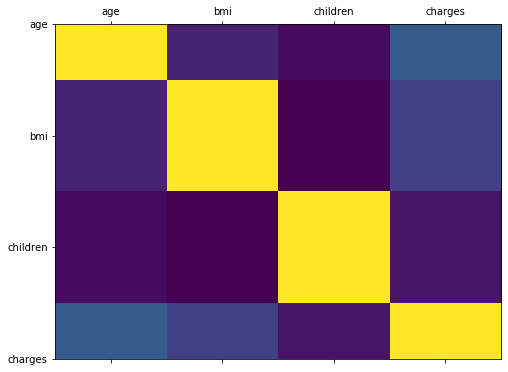

In [5]:
plot_corr(df)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [8]:
df.corr() 

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [9]:
 # very less correlation and not helpful in prediction 
del df['region']

In [10]:
# splitting the dependent and independent variable
x = df.iloc[:,:5]
y = df.iloc[:,5]

from sklearn.model_selection import train_test_split

# splitting training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

error in pridiction of actual value : 29.76


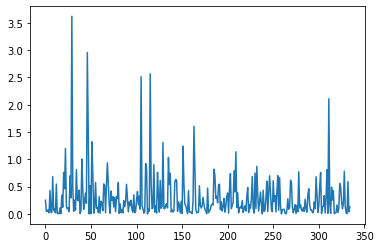

In [29]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 35, max_depth = 7, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
#error plot 
plt.plot(abs(((y_test - y_pred)/y_test).ravel()))
#error calculation 
k = np.mean(abs(((y_test - y_pred)/y_test).ravel()))
print ( "error in pridiction of actual value : {0:.2f}".format((k) *100))

error in pridiction of actual value : 35.36


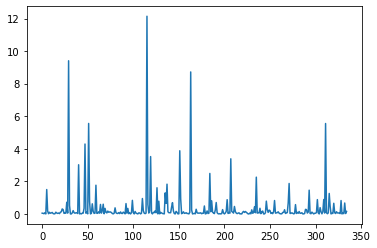

In [27]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train.ravel())

# predicting the test set results
y_pred = model.predict(x_test)
#error plot 
plt.plot(abs(((y_test - y_pred)/y_test).ravel()))
#error calculation 
k = np.mean(abs(((y_test - y_pred)/y_test).ravel()))
print ( "error in pridiction of actual value : {0:.2f}".format((k) *100))